In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
save_path = '../plots/'
data_path = "../manuscript_data.xlsx"

In [3]:
# import data into a pandas dataframe.
ja = pd.read_excel(data_path, sheet_name="JA")
ja.head(3)
ja_summary = ja.describe()

# add data to another sheet of the same excel file.
with pd.ExcelWriter("../summary.xlsx", engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
    ja_summary.to_excel(writer, sheet_name="JA", index=True)


In [4]:
# define columns to be used for data visualization.
d13C=ja["d13C"]
depth = ja["depth"]
Hg = ja["Hg"]
TOC= ja["TOC"]
Sr = ja["Sr"]
Nd = ja["Nd_t"]
Sr_2sd = ja["Sr_2se"]
Nd_2sd = ja["Nd_2se"]
Fe =ja['Fe2O3']
Mn = ja['MnO']
Ba = ja['Ba']
Nd143 = ja['Nd143']

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


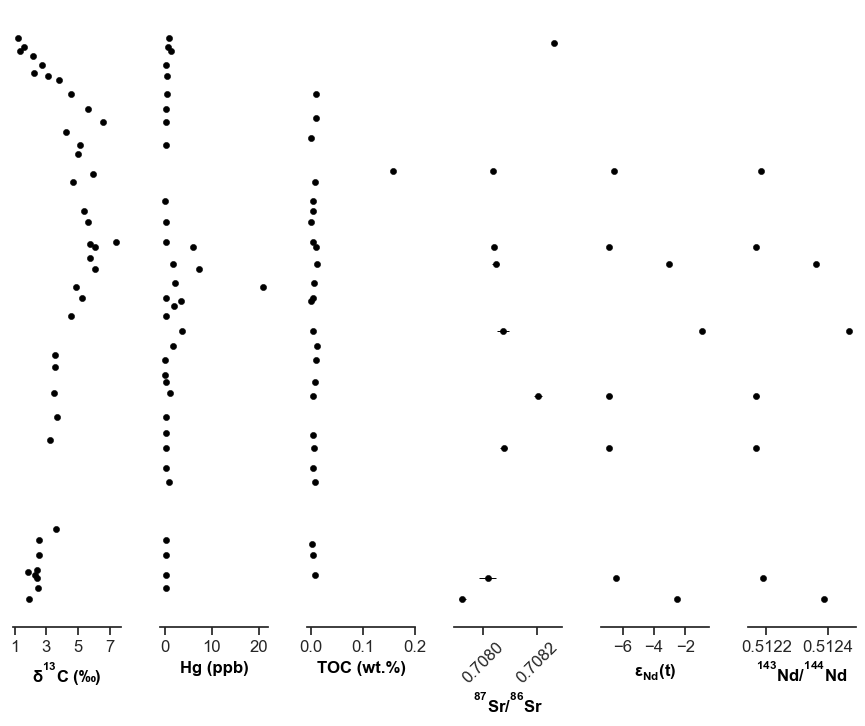

In [5]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(9, 6.8),  # constrained_layout=True,
                         ncols=6, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
plt.tight_layout()

#define the variables needed to iterably make the figures.
subs = ['d13C', 'Hg', 'TOC', 'Sr', 'Nd_t', "Nd143"]
ax= [ax0, ax1, ax2, ax3, ax4, ax5]
xlabels = ["$\delta^{13}C\;(‰)$", "Hg (ppb)", "TOC (wt.%)",
           "$^{87}Sr/^{86}Sr$", "$\epsilon_{Nd}(t)$", "$^{143}Nd/^{144}Nd$"]
err = ["Sr_2se", "Nd_2se", "Nd143_2se"]
err_subs = [Sr, Nd, Nd143]
ax_2=[ax3, ax4, ax5]
# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=ja, x=ja[sub], y=depth, ax=ax[ix],
                    color='black', legend=False, edgecolor='black',
                    s=20,
                    )
    ax[ix].tick_params(labelsize=12)
    ax[ix].set_xlabel(xlabels[ix], fontsize=12, c="black", fontweight="bold")
ax4.set_xticks([-6, -4, -2, 0])
ax2.set_xticks([0, .1, .2])
ax1.set_xticks([0, 10, 20])
ax0.set_xticks([1, 3, 5, 7])

# add error bars to Nd and Sr-isotope subplots
for ix, sub in enumerate(err):
    ax_2[ix].errorbar(xerr=ja[sub], y=depth,x=err_subs[ix], ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
    
# change orientation of the x-axis labels on the Sr isotope plot
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
    
plt.savefig("../plots/JA_all.pdf", dpi=600)

Make a smaller figure height for correlation plot

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


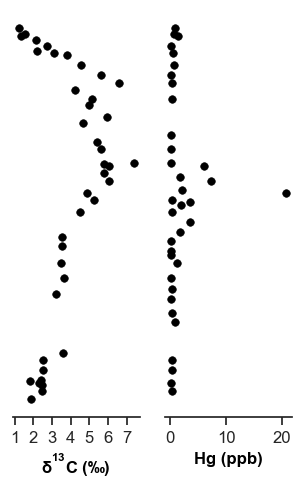

In [6]:
fig, axes = plt.subplots(figsize=(3.6, 5.3), nrows=1, ncols=2, sharey=True)
ax0, ax1 = axes
ax_list = [ax0, ax1]
plt_list = [d13C, Hg]
labels = ["$\delta^{13}C\;(‰)$", "Hg (ppb)", ]
xticks = [[1, 2,3,4,5,6,7], [0, 10, 20]]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])

def make_plot(data, f_size, f_name):
    for i in range(len(ax_list)):
        sns.scatterplot(data=data, x=plt_list[i], y=depth, ax=ax_list[i],
                        color='black', legend=False, edgecolor='black',
                        s=30,
                        )
        ax_list[i].tick_params(labelsize=f_size)
        ax_list[i].set_xticks(xticks[i])
        ax_list[i].set_xlabel(labels[i], fontsize=f_size, c="black", fontweight="bold")
    plt.savefig(f'{save_path}{f_name}.pdf')

make_plot(ja, 12, 'ja_all-small');

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


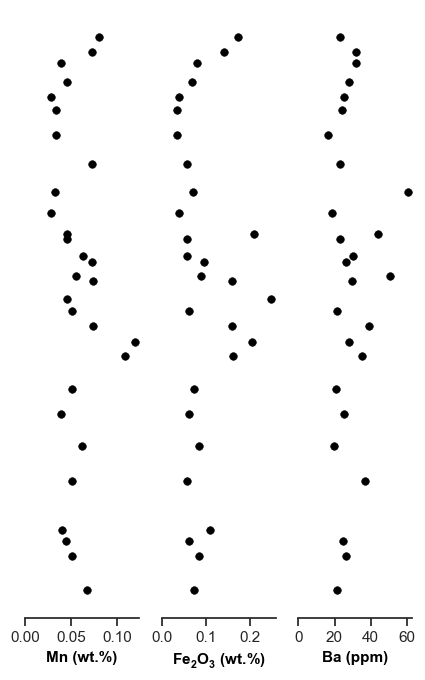

In [7]:
fig, axes = plt.subplots(figsize=(5, 7.9), nrows=1, ncols=3, sharey=True)
ax0, ax1, ax2 = axes
ax_list = [ax0, ax1, ax2]
plt_list = [Mn, Fe, Ba]
labels = ["Mn (wt.%)", "$Fe_{2}O_{3}$ (wt.%)", "Ba (ppm)"]
xticks = [[0, 0.05, 0.1], [0, .1, .2], [0, 20, 40, 60]]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])

def make_plot(data, f_size, f_name):
    for i in range(len(ax_list)):
        sns.scatterplot(data=data, x=plt_list[i], y=depth, ax=ax_list[i],
                        color='black', legend=False, edgecolor='black',
                        s=30,
                        )
        ax_list[i].tick_params(labelsize=f_size)
        ax_list[i].set_xticks(xticks[i])
        ax_list[i].set_xlabel(labels[i], fontsize=f_size, c="black", fontweight="bold")
    plt.savefig(f'{save_path}{f_name}.pdf')

make_plot(ja, 11, 'ja_elements');

In [8]:
ja2 = pd.read_excel(data_path, sheet_name="elements")
depth = ja2['position']
ja2.head(3)
Mn = ja2['Mn']
Fe=ja2['Fe2O3']
Ba = ja2['Ba']


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


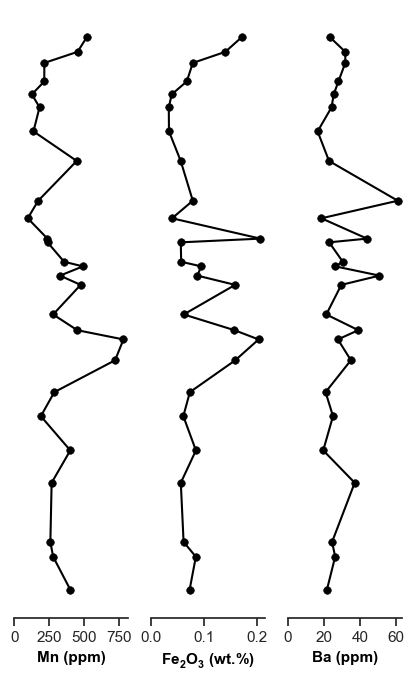

In [9]:
fig, axes = plt.subplots(figsize=(5, 7.9), nrows=1, ncols=3, sharey=True)
ax0, ax1, ax2 = axes
ax_list = [ax0, ax1, ax2]
plt_list = [Mn, Fe, Ba]
labels = ["Mn (ppm)", "$Fe_{2}O_{3}$ (wt.%)", "Ba (ppm)"]
xticks = [[0, 250, 500, 750], [0, .1, .2], [0, 20, 40, 60]]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])

for i in range(len(plt_list)):
    ax_list[i].plot(plt_list[i], depth, color="black")

make_plot(ja, 11, 'ja_elements2')